## Project Description: Statistical Tools for Social Scientists
#### By: Alex Richard Zhao

The most rewarding aspect of research is statistically analyizing data to investigate whether patterns or relations exist among variables of interest. 

I have expanded upon my work in the Computational Social Science Minor to build several functions to gather some basic statistics, conduct simple bivariate regression with optional plotting, and engage in supervised machine learning with optional summary details and/or k-fold cross validation. My interest for this project derives from my time in R where the functions for conducting these statistics are much more straightforward. Therefore, I'm hoping to replicate some of those functions in Python for future use should I find myself entering back into python. All in all, I have written four functions, two simple and two complex. 

#### Importing Modules 

In [1]:
from my_module import stats_functions as stats
from my_module import test_functions as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import model_selection

#### Using Basic Averaging Function in lieu of np.mean

In [2]:
# Initializing a Test List
test_list = [1, 2, 3, 4 ,5]

In [3]:
# The avg function computes the average of a given list or dataframe column
stats.avg(test_list)

3.0

In [4]:
# Testing if the results are consistent with the traditional np.mean() function
tests.test_avg(test_list)

The Function Works


#### Using the Created Standard Deviation function in lieu of np.std() 
Note this function is currenlty bugged and is not computing the correct standard deviation

I based the function on the standard deviation equation, however I'm not sure where in the formula I messed up

In [5]:
# Using the same test_list, using the written function
stats.sd(test_list)

1.5811388300841898

In [6]:
# I know this function is bugged so what is the correct std according to numpy
np.std(test_list)

1.4142135623730951

In [7]:
# Testing if the results are consistnent with the traditional np.std() function
tests.test_sd(test_list)

Something is Wrong with the Math


### Simple Data Analysis using two datasets from the seaborn module

#### Bivariate Regression of Flights and Years
##### Loading the Flights Dataset

In [8]:
# This is a dataset on flights over time
flights = sns.load_dataset("flights")

In [9]:
# It would be useful to take the time to feature engineer months into an ordinal variable however for parsimony sake
# However for parsimony sake, I decided to investigate the number of passengers over time (measured in years)
# The .head() function desplays the first 5 rows of the dataset, however as demonstrated you can pass a number
# to see more.
flights.head(12)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


##### Explanation of Function
The "bivariate_model" function takes an X and Y variable in the form of df["col_name"] with an optional plots argument. The defualt is false, however you can set it to True to compare the training and test plots. 

The function will take the data (assuming there are no Missing or NaNs values) and split them into a test and training set. This allows us to assess model performance of standard ols and identify whether linear regression is the best tool. Perhaps, logistic regression or other feature engineering would be needed if the R^2 values are too low for expectations or the Mean Squared Error is too high. 

Now the function will return the Mean Squared Error (MSE) and R^2 values for the training and test sets. It will also provide the training model equation used in the test set. When plots = True, the functions will provide comparable plots with useful information on the bottom right hand side. In retrospect, if the data presents a negative coefficient, you would have a difficult time reading the results. In that case, the function would have to be revised. In the future, I will most likely include a positional_legend argument to change that. 

The MSE provides information to indicate how far the average distance each point is from the training model equation line and is often a good indicator for whether we are overfitting the model to the training set. Meanwhile, the R^2 values are good tools to assess if not only our explanatory variables are accounting for a good number of the variation in the dependent variable, but whether we are overfitting the data. In this case, standard bivariate ordinarly least squares regression performs quite well.

Mean Squared Error: 4.737737463871234
Training R^2: 0.8543097708222659
Testing R^2: 0.8299228218933903
y =  32.220505451645764 *x +  -62694.014211386486



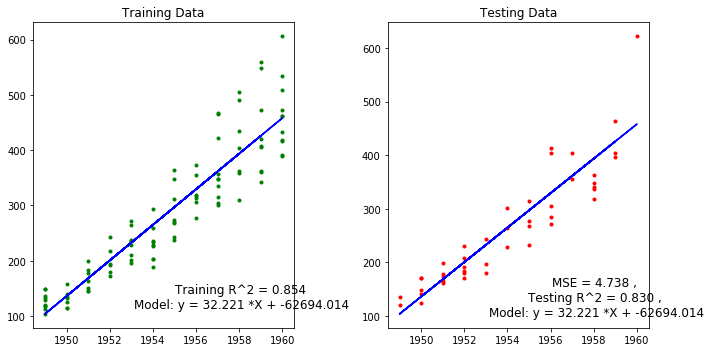

In [10]:
# Using the bivariate model on year vs passengers
stats.bivariate_model(flights["year"], flights["passengers"], plots = True)

##### Results
This is an interesting finding as passenger flights did not exponentially grow since the late 1940s. Instead there exists a linear growth, which seems reasonable given planes slowly advancing to be larger and more commerically comforting rather than being bigger and stuffing people. The vertical lines in the data are a result of there being 12 months per year which provides 12 observations per each unit of X. There does seem to be some heteroscadsticity so by the 1960 period but overall the model performs well. 

#### "Multivariate" Regression of Planetary Data

##### Loading Data and Dropping NaNs

In [11]:
# Loading the planets dataset
planets = sns.load_dataset("planets")

# Dropping missing data
planets = planets.dropna()

# Examing the first 10 Rows
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010
10,Radial Velocity,2,883.000,0.86,74.79,2010


##### Explanation of Function
The "general_regression" function takes can take multiple X variables in the form of df[["col_name1", "col_name2", ...]] and a Y variable in the form of df["col_name"]. There are optional summary, kfoldcv, and splits argument. The defualt are all false (or 10 for the number of splits), however you can set it to True (or change the number) to examine those outputs. 

The function will take the data (assuming there are no Missing or NaNs values) and split them into a test and training set. This allows us to assess model performance of standard ols and identify whether linear regression is the best tool. Perhaps, logistic regression/other models or other feature engineering would be needed if the R^2 values are too low for expectations or the Mean Squared Error is too high. 

Now, the function will return the Mean Squared Error (MSE) and R^2 values for the training and test sets. If summary is set to True, then the function will return the Model Summary results for each independent variable. However it does not have the y-intercept, so having the model equation handy is currently not a feature. Since this function can take on multiple X variables, there is no plotting function at the moment. If kfoldcv is set to True then the function will carry out k-folded cross validation using the assigned number of data splits (the default value is 10). This will provide the results in a list which can be used to calculate the cross validation mean and standard deviation to identify overall model performance across various splits. It can also show the variation in model scores which in theory could be bootstrapped to find the most accurate and least biased model. 

In [12]:
# Using the general regression model on mass and distance to regress orbital_period
stats.general_regression(planets[["mass", "distance"]], planets["orbital_period"], summary = True, kfoldcv = True, splits = 9)

-------------Model Assessment-------------
Mean Squared Error: 2939.152929938315
Training R^2 0.026597673701568625
Testing R^2 0.11263877171001457

------------------------------------Model Summary------------------------------------
                                 OLS Regression Results                                
Dep. Variable:         orbital_period   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.159
Method:                 Least Squares   F-statistic:                              36.17
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    4.47e-15
Time:                        13:45:11   Log-Likelihood:                         -3284.0
No. Observations:                 373   AIC:                                      6572.
Df Residuals:                     371   BIC:                                      6580.
Df Model:                           2                         

##### Results

Regression is not the right tool for analyzing this planetary data. The Mean Squared Error is incredibly high and the R^2 score are incredibly low. Futhermore the cross validation results indicate a negative mean score which means our models are actually useless. Now, in the script, both functions are used on the flight data which already performed well as above but the cross validation results confirm this.

Overall, this project demonstrates the power of linear regression in determining linear relations by investigating two distinct datasets. 


#### Extra Credit

Replace all of this text with a brief explanation (~3 sentences) of: 
1. I started learning python last winter in CSS1 where I learned most of the material we covered in this course. In CSS2, we covered applying python to data analysis which really peaked my interest as I intend to enter academia and use these methods in future research. 
2. Therefore, while I may not have started from scratch in this course, I decided to take advantage of the overlapping final projects to create some universal functions that I can call upon in the future or improve. NOTE, I did not use the same dataset or have the same specific analytical structure for my COGS 18 and CSS2 Finals submissions. For my CSS2 submission I used WDI indicators to investigate wealth vs health, while for COGS 18 I am using a completely foreign seaborn dataset. The functions are identical, with the exception of my "multivariate_regression" where I could not debug an optional "display_model" argument which would display the equation used for the multivariate regression, and removed it to make my life a little easier. Overall, I could have created simple functions with minimal arguments for both courses, however I decided to take the time to create some beautiful analytical tools that I am extremely proud of. As a final aside, the "avg" and "sd" functions were not components of my CSS 2 final. 